In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Classification

In classification, we predict categorical labels. In regression, we predict quantitative/numerical labels. The critical difference is that we can't take a difference between the predicted and actual category in classification, while we can take a difference between the predicted and actual numerical values in regression. Because of these differences between regression and classification, we use different metrics to evaluate machine learning models trained for classification.

As with regression, we're trying to determine the model $f$ that can best describes the relationship

$$ y_j = f(X_j). $$

For classification, $y_j$ can only take a finite set of values. If there are only two such values, we are dealing with **binary** classification. Examples of binary classification are predicting whether it will rain or not and whether someone will default on their loan. If we have more than two classes, we have a **multiclass** problem. For example, image classification is usually multiclass as we are trying to identify an image among a set of values, e.g., a person, a road sign, a car, etc.

In [ ]:
&

## Accuracy

A natural choice for a metric for classification is accuracy. Accuracy is equal to the number of observations you correctly classified over all observations. For example, if your model properly identified 77 out of 100 images, you have an accuracy of 77%. Accuracy is an easy metric to both understand and calculate. Mathematically, it is simply

$$ \frac{\text{number of correct observations}}{\text{number of observations}}.$$



However, accuracy may not always be a good metric. Consider the case of disease detection where only 10% of the observations have the disease. A naive classifier that always predicts the majority class will achieve 90% accuracy. 
While the naive model correctly identifies everyone without the disease, it fails to identify any person with the disease. We need a metric that will tell us how well our model performs for a particular class.

**now queston is, is accuacy always a good metric to use to evaluate our model all the time, what might be some issues with using accuracy?**

**lets cosider an example wea we tryna tell a model to detect disease, then only 10% of our observations have the disease, then a naive classifier will always predict the majority class, that people dont have the disease. given that only 10% have the disease, what wud be accuracy of this naive model that always predict the majority class, that always predict people dont have the disease coz thats the majority class class in this situation? 
That means that our model will have a 90% accuracy, this naive model will be 90% accurate and thats a problem. coz if i tell i have a classfction model that is 90% accurate if i dnt tell you anything else, it might seem i have a very good model, 90% is predict good.  wel we gotta consider whats the balance btn these two classes in this case. if we look at it, wait a minute, 10% of popn has a disease, so a naive model will always predict majority class, then  u telling yo model is 90% accurate, it isn't so impressive so maybe thereis another metrics we can use instaed of accuray that wont have ths problem
some two metrics we can use that wont have this problem is the idea of precison and recall**


## Precision and recall

For the example of disease detection, we are more interested in determining our model's performance with regards to the class representing having the disease. Let's call this class  **positive** and not having the disease as **negative**. Particularly, we want to know what fraction of all positive predictions were correct and what fraction of positive ob
servations did we identify. The two metrics that describe these values are precision and recall. Precision is the fraction of true positives over all positive predictions. It is a measure of how "precise" our model was with regards to labeling observations as positive. Recall, on the other hand, is equal to the fraction of true positives over all positive observations. It is a measure of our model's ability to "catch" and properly label observations that are positive.

**A confusion matrix** is a table summarizing the performance of the model by enumerating true and false positives and the true and false negatives.

|                     | Positive Observation     | Negative Observation    |
|---------------------|:------------------------:|:-----------------------:|
| Positive Prediction |     True Positive (TP)   | False Positive (FP)     |
| Negative Prediction | False Negative (FN)      |     True Negative (TN)  |

Given the definitions used earlier, the equation for precision and recall are

$$ \text{precision} = \frac{\text{TP}}{TP + FP}$$
and
$$ \text{recall} = \frac{\text{TP}}{TP + FN}. $$

Note, the difference between the metrics is their denominator. In our disease detection example, if we labeled 12 observations as positive but only 8 were actually true positives, our precision is 0.667. If our data set had 10 positive observations, since we correctly identified or "recalled" 8 of them, our recall is 0.8. If we had used the naive model that predicts the majority class, the recall would be 0 and our precision would be undefined.

What is more important, precision or recall? The answer depends on the specifics of the problem. Having a model that prioritizes less false positives will have a higher precision and a model that aims to reduce the number of false negatives will have a higher recall. You must decide whether your model should prioritize reducing false positives or false negatives. It is often helpful to consider the cost, whether financial, societal, etc., of your model making false positives and false negatives.

**Questions**

* For disease detection, is it better to have a higher precision or recall?
* Does our answer change if we need to have diagnosed patients undergo invasive and risky procedures?
* Is admissions to a top-tier university a high recall or high precision process?

In [ ]:
y.val

We can easily calculate classification metrics using the `sklearn.metrics` module. Let's first generate the result of our fictitious disease detection model. In addition to precision and recall, there is that $F_1$ score which is the harmonic mean of precision and recall. It is a nice metric to use when we don't have a preference over precision and recall. Note, the function `metrics.classification_report` will calculate the metrics for both scenarios of what class is considered positive or negative.

In [4]:
ax= np.zeros(100)
ax[:12] = 1
ax

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
import numpy as np
from sklearn import metrics

# generate our results
y_pred = np.zeros(100, dtype=np.int32)
y_pred[:12] = 1
y = np.zeros(100)
y[:8] = 1
y[-2:] = 1

print("precision: {:g}".format(metrics.precision_score(y, y_pred)))
print("recall: {:g}".format(metrics.recall_score(y, y_pred)))
print(metrics.classification_report(y, y_pred))

precision: 0.666667
recall: 0.8
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        90
         1.0       0.67      0.80      0.73        10

    accuracy                           0.94       100
   macro avg       0.82      0.88      0.85       100
weighted avg       0.95      0.94      0.94       100



In [5]:
metrics.precision_score(y, y_pred, pos_label=0, average='binary')

0.9772727272727273

In [6]:
metrics.accuracy_score?

In [7]:
metrics.accuracy_score(y, y_pred, normalize=False)

94

## Probabilistic Classification Models
Some classification models do not directly predict a class for an observation but instead reports a probability. For example, it might predict that there's a 75% chance the observation is positive. For the preceding example, should we assign a positive or negative label? The natural choice is to assign the observation as positive since the predicted probability is greater than 50%. However, we don't have to stick to 50%; we can adjust our **threshold** and only classify observations as positive if our models predicts a greater than 90% probability. By increasing the threshold, we will make our model only make positive predictions when it is very certain and confident. Conversely, if we lower our threshold, our model will more liberally assign positive labels. Adjusting threshold affects the models precision and recall. 

As we started to see earlier, there is tradeoff between precision and recall that becomes more apparent with probabilistic models. Let's explore and visualize the tradeoff between precision and recall. We'll generate some data 

In [6]:
# generate data
np.random.seed(0)
y_proba = np.linspace(0, 1, 1000)
y_predi = (y_proba > 0.5).astype(np.int32)
y = np.random.binomial(1, y_proba)

print("accuracy: {}".format(metrics.accuracy_score(y, y_predi)))

accuracy: 0.75


In [9]:
# from collections import Counter
# np.random.seed(0)
# y = np.random.binomial(1, y_proba)
# print (y)
# plt.hist(y)

In [10]:
# np.random.seed(0)
# y = np.random.binomial(10, , 20)
# Counter(y)
# y

In [11]:
# import string
# c= Counter('sulaimanisageniusman')
# for letter in string.ascii_lowercase:
#     print ('%s : %d' % (letter, c[letter]))


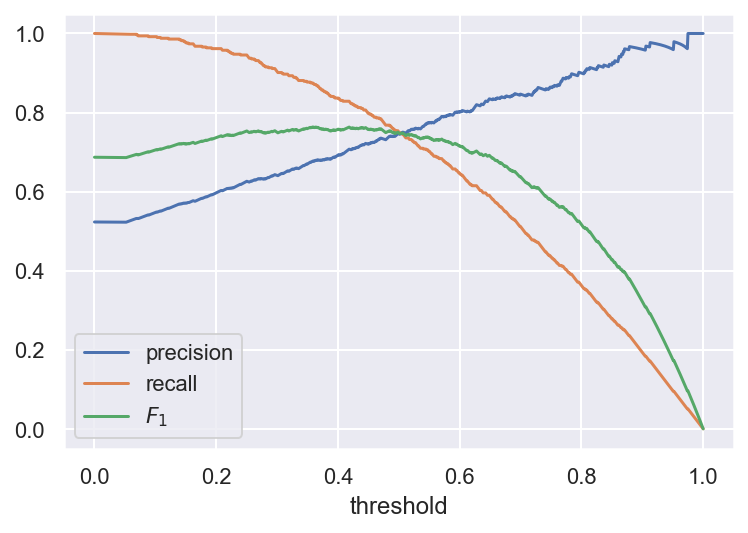

In [7]:
 precision, recall, threshold = metrics.precision_recall_curve(y, y_proba)
f1_score = 2*precision*recall/(precision + recall)
threshold = np.hstack((0, threshold))

plt.plot(threshold, precision);
plt.plot(threshold, recall);
plt.plot(threshold, f1_score)
#plt.scatter(0.373373, 0.746377)
plt.xlabel('threshold')
#plt.scatter(threshold, f1_score.max())
plt.legend(['precision', 'recall', '$F_1$']);


In [10]:
import pandas as pd

df = pd.DataFrame({'threshold':threshold, 'f1':f1_score})
df.head()

,threshold,f1
0,0.000000,0.686981
1,0.052052,0.686071
2,0.053053,0.686546
3,0.054054,0.687023
4,0.055055,0.687500


In [14]:
df[df['f1']==max(df.f1)]

,threshold,f1
307,0.358358,0.763412


In the above figure, we see how increasing the threshold led to higher precision but lower recall. The threshold that yielded the largest $F_1$ score was about 0.36. Any probabilistic model can achieve any arbitrary level of precision and recall by adjusting the threshold. As such, when comparing the performance of probabilistic classifiers, we need a single metric that is not dependent on threshold.

## Area under the curve
The precision-recall curve illustrates the tradeoff for a particular classifier. While there will always be a tradeoff between these two metrics, ideally the tradeoff should not be severe. In other words, the model should not sacrifice a large amount of precision to slightly improve recall. We can visualize the degree of the tradeoff by plotting what is known as a precision-recall curve.

In [15]:
plt.plot?

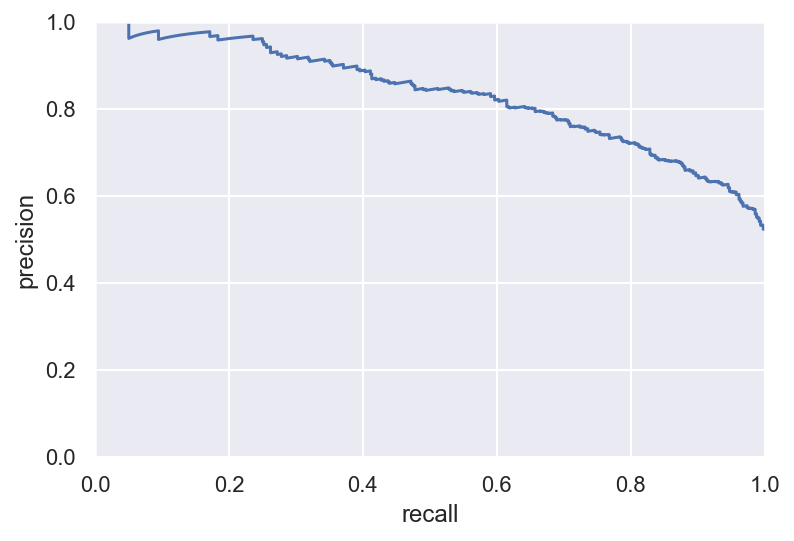

In [11]:
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')

plt.xlim([0, 1])
plt.ylim([0, 1]);

We want a model that has less tradeoff between precision and recall, resulting in a curve with less of a drop with increasing recall. Geometrically, it is better to have a model with a larger area under the curve, **AUC**, of its precision-recall plot. In `scikit-learn`, the AUC can be calculated using the `metrics.auc` function. In addition to **AUC**, there is the **ROC-AUC** metric which is based on the receiver-operator curve (ROC). The ROC plots the true positive rate against the false negative rate.

In [12]:
print("precision-recall AUC: {}".format(metrics.auc(recall, precision)))
print("receiver-operator AUC: {}".format(metrics.roc_auc_score(y, y_proba)))

precision-recall AUC: 0.833677363943477
receiver-operator AUC: 0.834057379672299


In the example, the resulting model had similar values for AUC and ROC. In general, if your data is imbalanced (more observation of the negative class) or if you care more about false positives you should rely on AUC of the precision-recall curve. Note, the number of true negatives are not factored in calculating either precision or recall.

## Log loss / Cross Entropy
A metric often used for optimizing probabilistic classifiers is the log loss function, sometimes referred to as cross entropy. Log loss takes into account uncertainty of your models predictions, something accuracy does not do. The equation for the log loss is

$$ -\sum_j \left[y_j \log(p_j) + (1-y_j)\log(1 - p_j) \right], $$

where $y_j$ is the class label of an observation, either 0 or 1, and $p_j$ is the probability the observation is in class 1. The lower the log loss, the better the model.

The log loss is harder to interpret than other metrics such as accuracy. It measures not only whether the model will correctly classify an observation but rewards the model if it's confidence of a correct prediction is high. Conversely, it will severely penalize the model for being overly confident in a prediction that is wrong. For example, a model will have a lower log loss if it predicts a probability of 95% for an observation of class 1 than if it had predicted 60%. Thus, it is possible for two models to have the same accuracy yet have different log loss. Despite being slightly harder to interpret, it reveals more information of a model's performance than accuracy. The figure below displays the reduction of log loss as a model becomes more certain in its prediction.

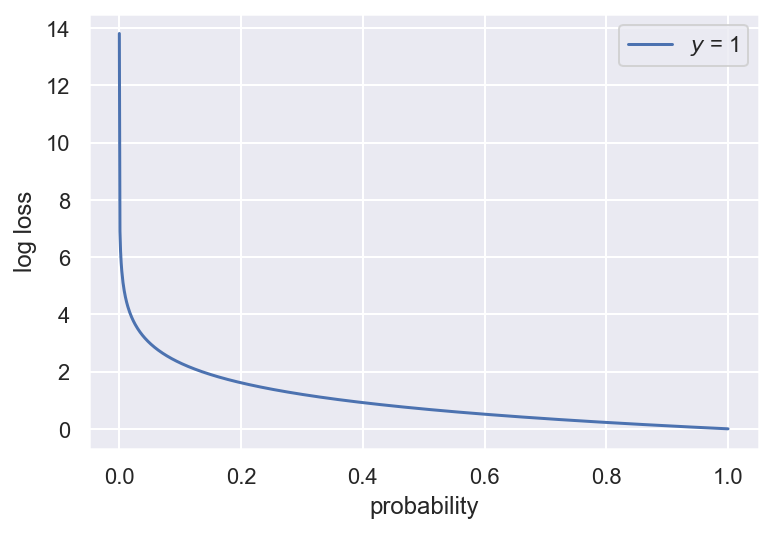

In [18]:
p = np.linspace(1E-6, 1-1E-6, 1000)
y = 1
log_loss = -(y*np.log(p) + (1 - y)*np.log(1 - p))

plt.plot(p, log_loss)
plt.xlabel('probability')
plt.ylabel('log loss')
plt.legend(['$y$ = 1']);

## Logistic regression
The logistic regression model is the classifier version of linear regression. It is a probabilistic model; it will predict probability values that can then be used to assign class labels. The model works by taking the output of a linear regression model and feeds it into a sigmoid or logistic function. Mathematically

$$ p_j = S\left( \sum_{i} X_{ji}\beta_i  + \beta_0 \right), $$
where
$$ S(x) = \frac{1}{1 + e^{-x}} $$

The reason for the sigmoid function is that it maps values that range from positive to negative infinity to values that only range from 0 to 1. Thus, the output of the sigmoid function can be interpreted as a probability. An example of the sigmoid function is shown below.

In [15]:
x.shape

(100,)

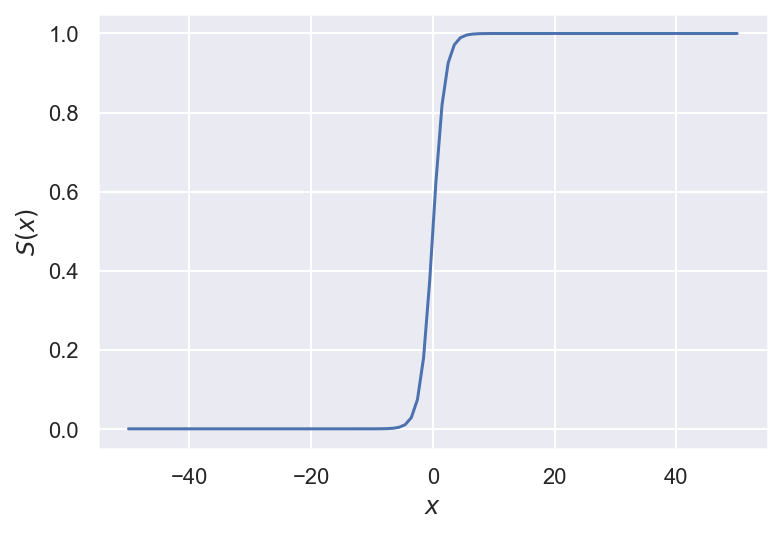

In [13]:
x = np.linspace(-50, 50, 100)
s = 1/(1 + np.exp(-x))

plt.plot(x, s)
plt.xlabel('$x$')
plt.ylabel('$S(x)$');

The $\beta$ coefficients of the model are chosen to minimize the log loss. Unlike linear regression, there is no closed-form solution to the optimal coefficient. Instead, the coefficients are solved using gradient descent.

Let's train a logistic regression model through `scikit-learn`. We'll first train a model and plot it's **decision boundary**. The decision boundary is a boundary (or hypersurface in larger dimensional spaces) that illustrates how the model classifies observations. A decision boundary is a nice way to visualize how the model is making predictions.

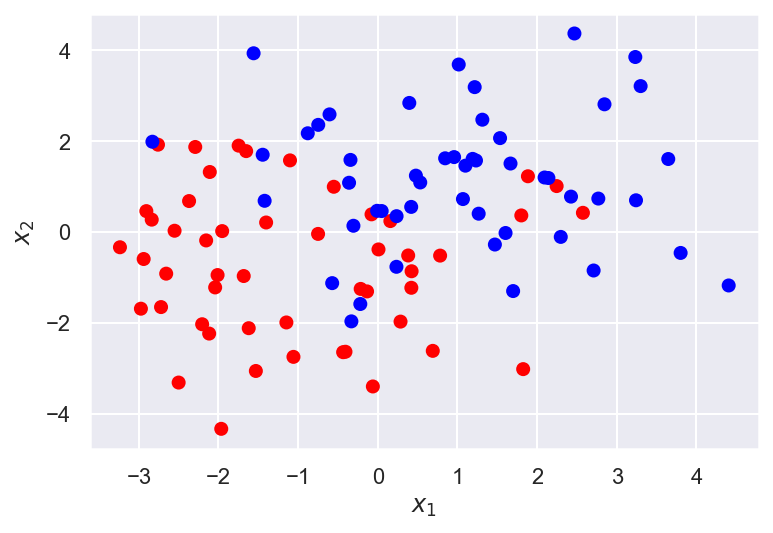

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=[[1, 1], [-1, -1]], cluster_std=1.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)
y_pred = clf.predict(X)

print("accuracy: {}".format(metrics.accuracy_score(y, y_pred)))

accuracy: 0.84


In [27]:
X1.reshape(-1,1)

array([[-5.        ],
       [-4.79591837],
       [-4.59183673],
       ...,
       [ 4.59183673],
       [ 4.79591837],
       [ 5.        ]])

In [28]:
proba = clf.predict_proba(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))

In [ ]:
proba

In [ ]:
X

In [29]:
clf.classes_

array([0, 1])

In [25]:
np.meshgrid?

In [26]:
#construct a decison boundary
#what is the proba of  observtion to be in certain class

X1, X2 = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))

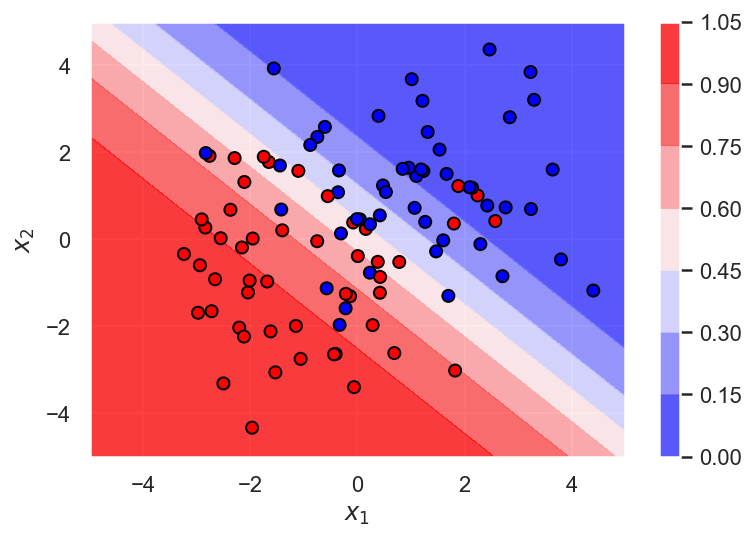

In [30]:
y_proba = clf.predict_proba(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))[:, 1]
plt.contourf(X1, X2, y_proba.reshape(50, 50), cmap=plt.cm.bwr, alpha=.75, vmin=0, vmax=0.95)
plt.colorbar()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='black')#, edgecolors='black')#, cmap=plt.cm.bwr)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

Notice that the classifier forms a linear decision boundary; logistic regression models are referred to as linear classifiers. The model forms a linear boundary because there is a linear relationship between the features and the input of the sigmoid function.

## Multiclass classification for binary classifier
Some classifiers can only model problems with two classes. For example, logistic regression is a binary classifier. However, there are ways to modify binary classifiers to extend them to predict multiple classes. Two common methods are the **one-vs-all** and the **one-vs-one** scheme.

In one-vs-all, you train $k$ binary classifiers, where $k$ is the number of classes. Each binary classifier represents training with observation of class $k$ and class not $k$. The probability of being in each class is calculated using an equation that normalizes the output of each classifier

$$ p_k = \frac{f_k}{\sum_{k} f_k} , $$

where $f_k$ is the output of classifier $k$ and $p_k$ is the probability of the observation being in class $k$. Given the normalization, the sum of $p_k$ for all values of $k$ is equal to 1.

In one-vs-one, we training classifiers of all possible pairings between the classes. For example, if we have classes A, B, C, and D we train classifiers for A vs. B, A vs. C, A vs. D, B vs. C, B vs. D, and C vs. D. If we have $k$ classes, we train $k(k-1)/2$ classifiers.

** Questions**
* If the one-vs-all scheme usually requires training less classifiers, when would it be better to deploy one-vs-one?   

In [31]:
LogisticRegression?

*Copyright &copy; 2019 The Data Incubator.  All rights reserved.*